In [3]:
!pip install pandas


In [4]:
import pandas as pd

In [6]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
final_df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [16]:
final_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [18]:
final_df = pd.get_dummies(final_df,drop_first = True)
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [19]:
final_df['Current_Year'] = 2020
final_df['No_of_years'] = final_df['Current_Year']-final_df['Year']
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Current_Year,No_of_years
0,2014,3.35,5.59,27000,0,0,1,0,1,2020,6
1,2013,4.75,9.54,43000,0,1,0,0,1,2020,7
2,2017,7.25,9.85,6900,0,0,1,0,1,2020,3
3,2011,2.85,4.15,5200,0,0,1,0,1,2020,9
4,2014,4.60,6.87,42450,0,1,0,0,1,2020,6


In [23]:
final_df.drop(['Current_Year'],axis=1,inplace=True)


KeyError: "['Current_Year'] not found in axis"

In [25]:
final_df.drop('Year',axis=1,inplace=True)

In [26]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,No_of_years
0,3.35,5.59,27000,0,0,1,0,1,6
1,4.75,9.54,43000,0,1,0,0,1,7
2,7.25,9.85,6900,0,0,1,0,1,3
3,2.85,4.15,5200,0,0,1,0,1,9
4,4.60,6.87,42450,0,1,0,0,1,6


In [29]:
#finding the correlation between features
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,No_of_years
Selling_Price,1.000000,0.878983,0.029187,-0.088344,0.552339,-0.540571,-0.550724,-0.367128,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.473306,-0.465244,-0.512030,-0.348715,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.172515,-0.172874,-0.101419,-0.162510,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,-0.053469,0.055687,0.124269,-0.050316,0.182104
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,1.000000,-0.979648,-0.350467,-0.098643,-0.064315
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,-0.979648,1.000000,0.358321,0.091013,0.059959
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,-0.350467,0.358321,1.000000,0.063240,0.039896
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.098643,0.091013,0.063240,1.000000,-0.000394
No_of_years,-0.236141,0.047584,0.524342,0.182104,-0.064315,0.059959,0.039896,-0.000394,1.000000


In [31]:
#ploting the pairplot using seaborn
!pip install seaborn

In [32]:
import seaborn as sns

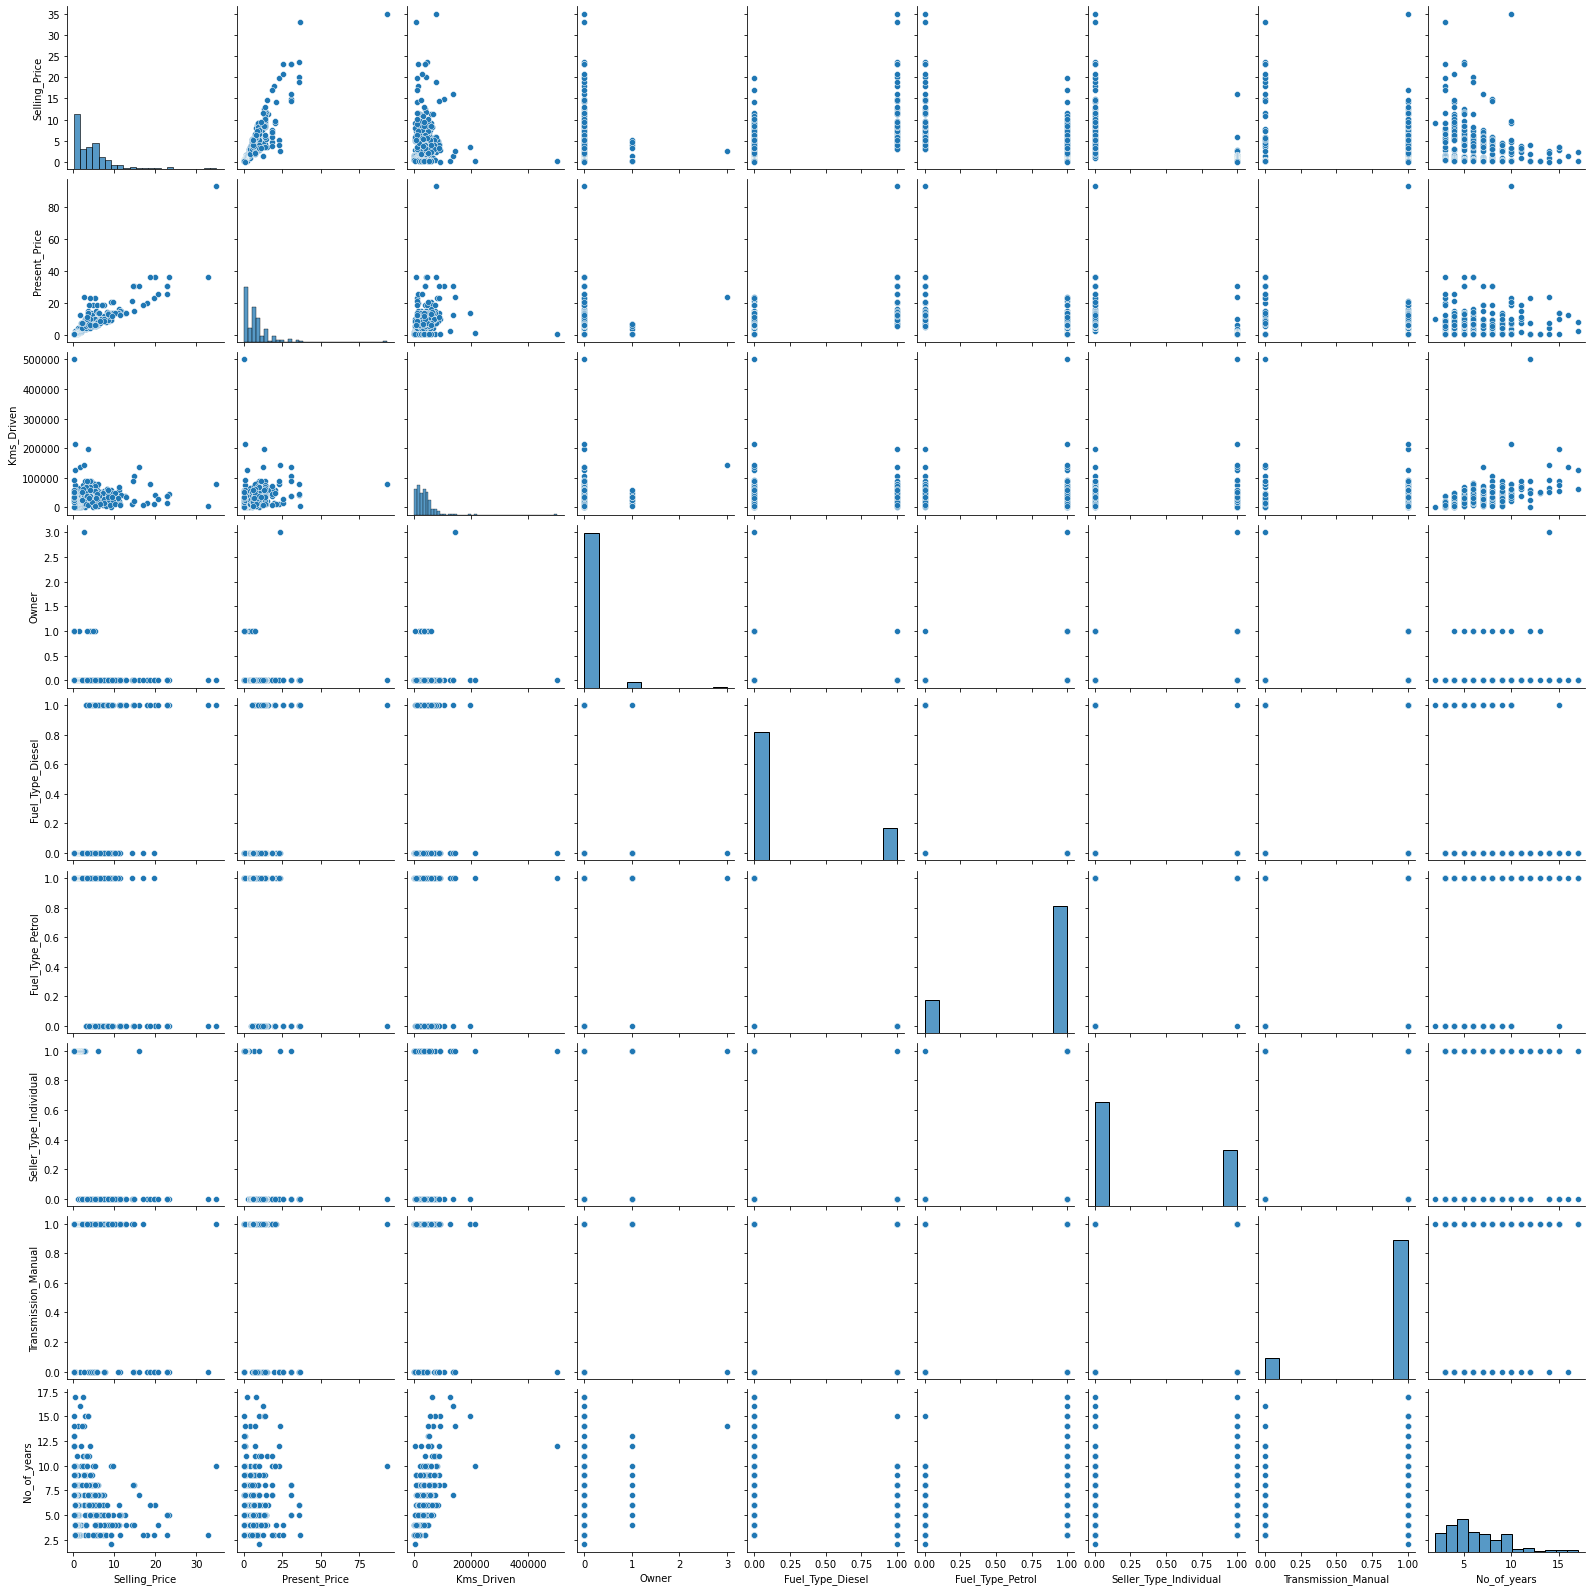

In [33]:
sns.pairplot(final_df)

In [36]:
#plotting heatmap for checking the corelated variables
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

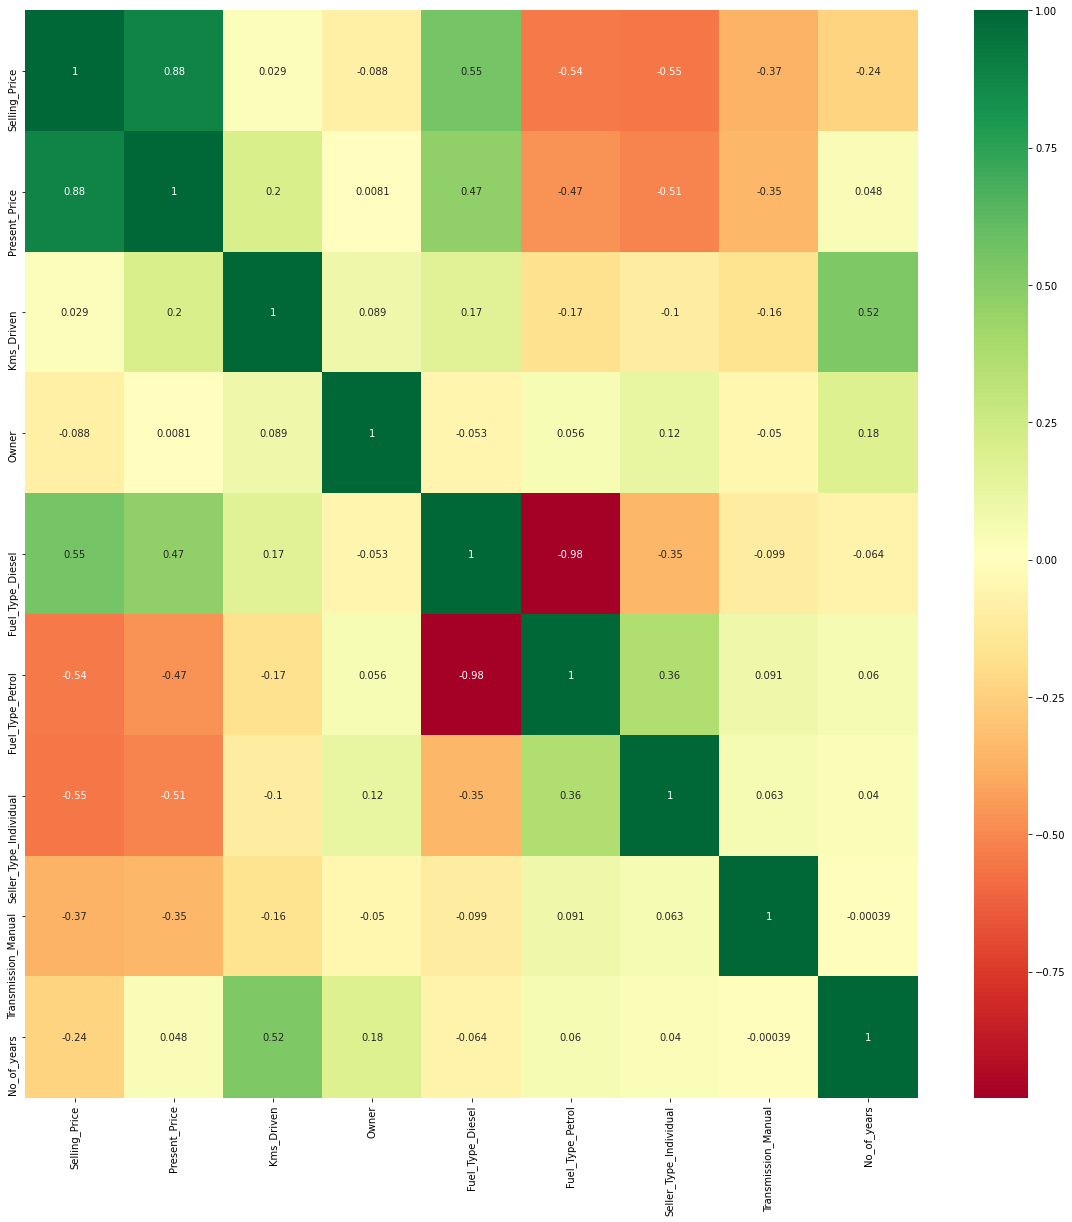

In [44]:
corrmat = final_df.corr()
top_corr_feat = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(final_df[top_corr_feat].corr(),annot=True,cmap = "RdYlGn")

In [ ]:
#As the features are less we are not dropping any variables

In [49]:
#creating dependent and independent variables
X= final_df.iloc[:,1:]
y=final_df.iloc[:,0]

In [50]:
X.head()

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,No_of_years
0,5.59,27000,0,0,1,0,1,6
1,9.54,43000,0,1,0,0,1,7
2,9.85,6900,0,0,1,0,1,3
3,4.15,5200,0,0,1,0,1,9
4,6.87,42450,0,1,0,0,1,6


In [51]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [53]:

!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=0c6407100eb824cb4bfb322a3da002eea1e812545433f85c319c915ee26e8dee
  Stored in directory: c:\users\sathwik\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [54]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [55]:
print(model.feature_importances_)

[0.39617101 0.04497113 0.00040073 0.21334038 0.01493789 0.12466219
 0.1303     0.07521668]


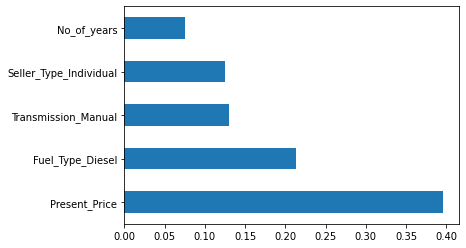

In [57]:
#plotting the feature importances and considering the top 5 features
feat_importance = pd.Series(model.feature_importances_,index = X.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
##above graph shows that present_price has the more feature importance compare to others

In [58]:
##creating the train and test splits
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [59]:
X_train.shape

(240, 8)

In [62]:
y_train.shape

(240,)

In [70]:
#creating the model
from sklearn.ensemble import RandomForestRegressor


In [63]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

In [67]:
#hyper parameter tuning
import numpy as np
#No. of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100,stop =1200,num=12)]
print(n_estimators)
#No. of features to consider every split
max_features = ['auto','sqrt']
#maximum no. of levels in a tree
max_depth = [int(x) for x in np.linspace(5,30,num =6)]
print(max_depth)
#minimum no. of samples required to split each node
min_samples_split = [2,5,10,15,200]
#minimum no. of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
[5, 10, 15, 20, 25, 30]


In [68]:
#creating the random grid
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 200], 'min_samples_leaf': [1, 2, 5, 10]}


In [71]:
#use the random grid for best hyper parameter tuning
#create a base model first
rf=RandomForestRegressor()

In [72]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=5,n_iter=10,n_jobs=1,verbose=2,random_state=42,scoring='neg_mean_squared_error')

In [73]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              200],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [74]:
#predict on test set
preds = rf_random.predict(X_test)
preds

array([ 0.9998618 ,  0.42636926,  0.50031269, 12.11337427,  2.57622622,
        4.63380233,  1.21726094,  7.38660712,  4.71100363,  0.68615106,
        5.11227807, 21.53956755,  0.99553979,  0.68615106,  5.28045163,
        0.60458463,  0.4145865 ,  0.36769782,  4.88781009,  4.3573087 ,
        6.63299582,  5.41359566,  5.35726495,  5.38950128,  3.1382457 ,
        5.78950996,  0.82522573,  3.55613252,  3.59156133,  0.53471017,
        0.38991081, 10.67261016,  0.43113018,  5.90011454, 10.10475815,
       11.01712775,  5.16222066,  3.70695685,  5.32636623,  1.24986655,
        6.11575129,  4.53696228,  4.06490109,  0.67016368,  0.45606144,
        1.23245247,  9.29213953,  3.02388772,  5.91019945,  8.04078959,
        7.68001336,  3.56795006,  3.34915783,  4.58732264,  3.02953901,
        0.50095513,  3.04474028,  1.17486999,  6.23717377,  6.71624878,
        5.1707643 ])

c:\users\sathwik\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

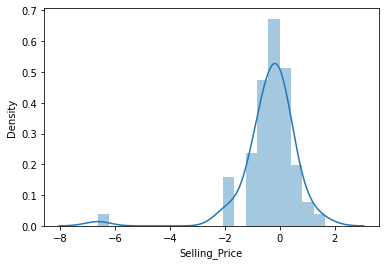

In [78]:
#plot the predictions
sns.distplot(y_test-preds)

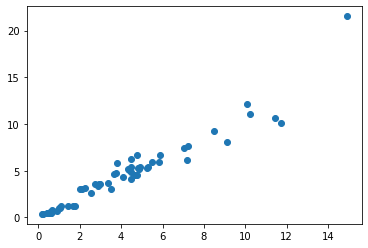

In [79]:
##we can see that data is normally distributed
#check for the linearity by plotting
plt.scatter(y_test,preds)

In [82]:
import pickle
#open the file where you want to store the data
file = open("random_forest_regression_model.pkl","wb")
#dump information into that file
pickle.dump(rf_random,file)